In [21]:
from scipy.sparse import csr_matrix
from scipy.spatial import Delaunay
import numpy as np
import networkx as nx
import alphashape
import matplotlib.pyplot as plt
from descartes import PolygonPatch

In [22]:
import tools.alpha_shape as alpha_shape

import tools.MST_dist as MST_dist
import tools.area as area
import tools.roundness as roundness
import tools.graph as graph
import tools.distance as distance
import tools.PC_attributes as PCD

In [23]:
import warnings
warnings.filterwarnings('ignore')

# Read data

In [24]:
points = np.array([
    (0.1, 0.), (0., 1.), (1., 0.9), (1.5, -0.2),
    (0.5, 0.25), (0.5, 0.75), (0.25, 0.5), (0.75, 0.5),
    (0.1, 0.4), (0.4, 0.9), (0.9, 0.2)
    ])

In [25]:
# centered data
X = points.T
mu = np.mean(X, axis = 1).reshape((2,-1))
Xc = X - mu
points_0 = Xc.T

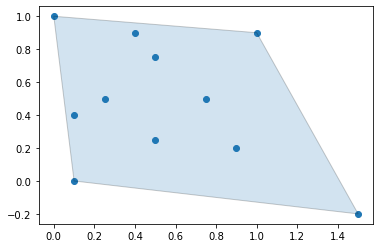

In [26]:
# Convex Hull
convex = alphashape.alphashape(points, 0)

fig, ax = plt.subplots()
ax.scatter(*zip(*points))
ax.add_patch(PolygonPatch(convex, alpha=0.2))
plt.show()

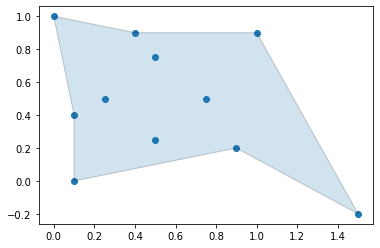

In [27]:
# alpha shape

ashape = alphashape.alphashape(points, 1.2)

fig, ax = plt.subplots()
ax.scatter(*zip(*points))
ax.add_patch(PolygonPatch(ashape, alpha=0.2))
plt.show()

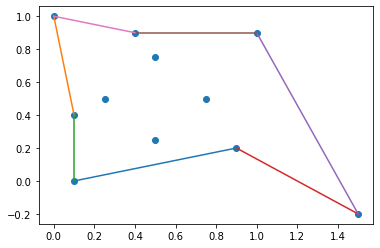

In [28]:
edges = alpha_shape.alpha_shape(points, 0.7, only_outer=True)

fig, ax = plt.subplots()
ax.scatter(*zip(*points))
for i, j in edges:
    ax.plot(points[[i, j], 0], points[[i, j], 1])
plt.show()

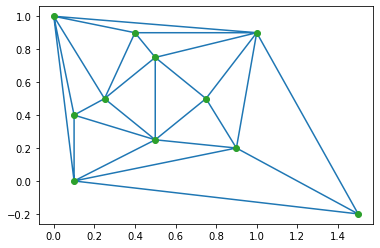

In [29]:
# Delaunay triangulation
tri = Delaunay(points)


plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [30]:
print(points[tri.simplices].shape)
# print(points[tri.simplices])

(16, 3, 2)


# Attributes

## Method 1: Attributes on 1st and 2nd Principal Components

In [32]:
X = points_0
pca = PCD.compute_PCs(X)

### Variances

In [33]:
total = sum(pca.explained_variance_)
print('explained variance:', pca.explained_variance_)
print('explained variance%:', pca.explained_variance_*100/total)

explained variance: [0.25242118 0.10948791]
explained variance%: [69.74712234 30.25287766]


### Distances

In [34]:
d1, d2 = PCD.compute_PC_distances(pca, X)
print("Distances on the two components:\n", d1, d2)

Distances on the two components:
 1.9126882913786563 1.246563266880523


### Plot

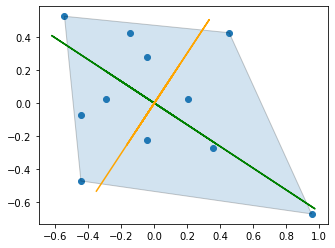

In [35]:
fig, ax = plt.subplots()
ax.scatter(*zip(*X))
ax.add_patch(PolygonPatch(alphashape.alphashape(X, 0), alpha=0.2))

component = 0
V = pca.components_[:,component].reshape((2,-1))
w = W[component,:].reshape(1,-1)
projections = V@w
ax.plot(*zip(*projections.T), color = "green")

component = 1
V = pca.components_[:,component].reshape((2,-1))
w = W[component,:].reshape(1,-1)
projections = V@w
ax.plot(*zip(*projections.T), color = "orange")


ax.set_aspect('equal')
plt.show()

## Method 2: Area

In [36]:
area1 = area.calculate_area(convex)
print("convex hull: ", area1)

area2 = area.calculate_area(ashape)
print("alpha shape area: ", area2)

convex hull:  1.215
alpha shape area:  0.9449999999999998


# Method 3: Roundness

In [37]:
roundness1 = roundness.compute_roundness(convex)
print("convex hull roundness")
print("roundness: ", roundness1)

roundness2 = roundness.compute_roundness(ashape)
print("ashape hull roundness")
print("roundness: ", roundness2)

convex hull roundness
roundness:  0.7114699229653245
ashape hull roundness
roundness:  0.5209110121913166


## Method 4: Maximum Euclidean distance

In [38]:
result = distance.compute_farthest_two_points(convex)
print('maximum Euclidean distance : ', result[0])
print('Two points: ', result[1])

maximum Euclidean distance :  1.9209372712298547
Two points:  ((1.5, -0.2), (0.0, 1.0))


## Method 5: Diameter of the graph

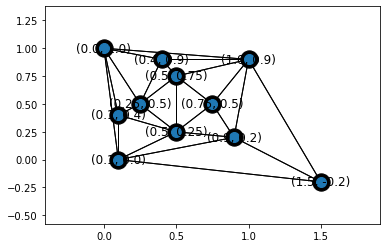

In [39]:
target_cluster = graph.graph(points[tri.simplices])

target_cluster.draw_graph()

In [40]:
diameter = target_cluster.get_graph_diameter()
print("diameter: ", diameter)

diameter:  3


## Method 6: Minimum spanning tree distance

In [41]:
target_cluster = graph.graph(points[tri.simplices])

# sparse
mst_distance = MST_dist.compute_mst_distance(target_cluster.get_graph())
print("maximum distance in MST: ", mst_distance)

maximum distance in MST:  10


Graph with 11 nodes and 10 edges


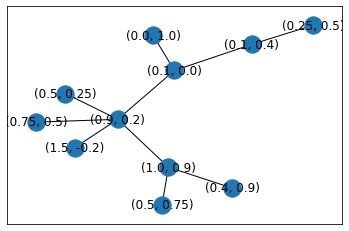

In [42]:
T = nx.minimum_spanning_tree(target_cluster.get_graph())
print(T)
nx.draw_networkx(T)